# 1. Package preparation

In [95]:
#! pip install missingno
#! pip install geopy
# !pip install geopandas
# !pip install geoplot   # need conda install -c conda-forge cartopy 
# !pip install shapely
import numpy as np
import pandas as pd
import geopy
np.set_printoptions(threshold=np.inf)
from scipy import stats
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import plt
%pylab inline
import missingno as msno 
import warnings # ignore the warnings
from geopandas import GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy.geocoders import Nominatim
import geoplot as gplt
from string import ascii_letters
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# 2. Data Selection and Modification

##### Understanding the house_type_id

In [96]:
UShousing1 = pd.read_csv('UShousing1.csv')
UShousing1.shape

(7919, 35)

In [97]:
UShousing1['house_type_id'].unique()

array([ 1., 21., 31., 11., 69., 64., 66., 68.])

In [98]:
# Replace house type number to character
UShousing1['house_type_id'] = UShousing1['house_type_id'].astype(str)
UShousing1['house_type_id'] = UShousing1['house_type_id'].map({'1.0': 'Apartment',
                                                               '11.0': 'Townhouse',
                                                               '21.0': 'House',
                                                               '31.0': 'Other',
                                                               '64.0': 'Apartment',
                                                               '65.0': 'House',
                                                               '66.0': 'Townhouse',
                                                               '67.0': 'Other',
                                                               '68.0': 'Entire_house',
                                                               '68.0': 'Private_bedroom',
                                                               '70.0': 'Shared_bedroom',
                                                               '71.0': 'Entire_property',
                                                               '78.0': 'Shared_living'})
UShousing1

,user_id,house_type_id,bedroom_count,bathroom_count,longitude,latitude,start_date,rent_amount,rent_period_id,currency_id,...,map_type,publisher_identity,rent_duration,language,identity,Country_geo,City_geo,State_geo,Postcode_geo,geometry
0,41,Apartment,1.0,1.0,-73.857997,40.862775,2017-09-25,1500.0,2.0,1.0,...,1.0,0,NaN,NaN,0.0,United States,New York,New York,10467.0,POINT (-73.85799704 40.86277534)
1,41,Apartment,1.0,1.0,-73.827866,40.693742,2017-09-25,900.0,2.0,1.0,...,1.0,0,NaN,NaN,0.0,United States,New York,New York,11419.0,POINT (-73.82786566 40.69374224)
2,41,Apartment,1.0,1.0,-73.951277,40.780365,2017-09-25,45.0,1.0,1.0,...,1.0,0,NaN,NaN,0.0,United States,New York,New York,10128.0,POINT (-73.95127662 40.78036462)
3,41,House,2.0,1.0,-122.269401,47.848989,2017-10-01,2040.0,2.0,1.0,...,1.0,0,NaN,NaN,0.0,United States,Lynnwood,Washington,98087.0,POINT (-122.2694009 47.8489894)
4,41,Apartment,1.0,1.0,-122.356306,47.647601,2017-10-01,1000.0,2.0,1.0,...,1.0,0,NaN,NaN,0.0,United States,Seattle,Washington,98109.0,POINT (-122.3563065 47.6476008)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,246542,Apartment,2.0,1.0,-71.067466,42.431090,2021-03-01,1950.0,2.0,1.0,...,1.0,0,NaN,zh,0.0,United States,Malden,Massachusetts,02176-6104,POINT (-71.0674657 42.43109)
7915,186472,Townhouse,1.0,1.0,-122.312883,47.589051,2021-03-31,1300.0,2.0,1.0,...,1.0,NaN,NaN,zh,0.0,United States,Seattle,Washington,98144,POINT (-122.3128833 47.5890506)
7916,325971,House,4.0,3.0,-122.257076,47.861079,2021-02-21,600.0,2.0,1.0,...,1.0,1,6.0,zh,0.0,United States,Lynnwood,Washington,98087,POINT (-122.257076 47.8610789)
7917,262092,Apartment,2.0,1.0,-73.820328,40.762538,2021-02-21,1800.0,2.0,1.0,...,1.0,0,0.0,en,0.0,United States,New York,New York,11354,POINT (-73.8203276 40.7625384)


In [99]:
# UShousing1.groupby('State_geo')['rent_amount'].mean()

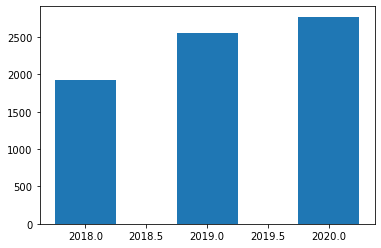

In [100]:
# Choose data from 2018 to 2020
open_date = '2018-01-01'
close_date = '2020-12-31'
con1 = UShousing1['start_date'] >= open_date
con2 = UShousing1['start_date'] <= close_date
UShousing1 = UShousing1[con1 & con2]


dates = UShousing1[['start_date']].dropna()
dates = pd.to_datetime(dates['start_date'],format = '%Y-%m-%d')
dates = dates.to_frame()
dates_cleaned = dates[dates.start_date < pd.to_datetime('2021-12-31',format = '%Y-%m-%d')]
dates_cleaned.describe()
dates_cleaned['year'] = pd.DatetimeIndex(dates_cleaned['start_date']).year
# dates_cleaned['year'].plot.hist(color = 'green',alpha = 0.8)
y = dates_cleaned.groupby(['year']).count()['start_date']
arr = plt.bar(x = [2018,2019,2020],height=y, width=0.5, label = True)


In [101]:
# Make sure the weird spots are Hawaii
# UShousing1.loc[UShousing1['State_geo'] == 'Hawaii', ['latitude', 'longitude', 'rent_amount']]

In [102]:
UShousing1['rent_period_id'] = UShousing1['rent_period_id'].astype(str)
UShousing1['currency_id'] = UShousing1['currency_id'].astype(str)
UShousing1['is_deleted'] = UShousing1['is_deleted'].astype(str)
UShousing1['identity'] = UShousing1['identity'].astype(str)

##### Missing value analysis - whether they are randomly missing

In [53]:
# Categorical columns selected
cat_df = UShousing1.select_dtypes(include = 'object')
# Check Radnomly Missing or not
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
# confusion_matrix = pd.crosstab(UShousing1['start_date'], UShousing1['start_date'])
# cramers_corrected_stat(confusion_matrix)

c_list = []
for c1 in cat_df:
    for c2 in cat_df:
#         print(c1, c2)
        confusion_matrix = pd.crosstab(UShousing1[c1], UShousing1[c2])
        c_value = cramers_corrected_stat(confusion_matrix)
        print(c1, c2, c_value)
        c_list.append([c1, c2, c_value])
        
c_df = pd.DataFrame(c_list, columns=['c1', 'c2', 'c_value'])


house_type_id house_type_id 0.9999999999999999
house_type_id start_date 0.19921895224224054
house_type_id rent_period_id 0.019588434596423985
house_type_id currency_id 0.0007290357218626345
house_type_id facility_flag 0.044726016645375954
house_type_id agent_flag 0.0
house_type_id is_deleted 0.014886559398807103
house_type_id create_time 0.11941525350193966
house_type_id update_time 0.10718898969920072
house_type_id update_utc_time 0.12837483983431935
house_type_id timezone 0.19081764444453303
house_type_id publisher_identity 0.024456021607340245
house_type_id language 0.07155707088935108
house_type_id identity 0.0
house_type_id Country_geo nan
house_type_id City_geo 0.2938966329866071
house_type_id State_geo 0.19798901757725126
house_type_id Postcode_geo 0.4110785839533016
house_type_id geometry 0.4376702065660488
start_date house_type_id 0.19921895224224045
start_date start_date 1.0
start_date rent_period_id 0.0
start_date currency_id 0.17852383346409564
start_date facility_flag 0.49

timezone State_geo 0.9410186381243967
timezone Postcode_geo 0.8792114110296892
timezone geometry 0.5142692703135073
publisher_identity house_type_id 0.024456021607340245
publisher_identity start_date 0.4651437490148775
publisher_identity rent_period_id 0.0
publisher_identity currency_id 0.0
publisher_identity facility_flag 0.38172199516357797
publisher_identity agent_flag 0.0
publisher_identity is_deleted 0.017414014157798127
publisher_identity create_time 0.10817564457171877
publisher_identity update_time 0.0934850041878312
publisher_identity update_utc_time 0.1046752255731747
publisher_identity timezone 0.1103948286638724
publisher_identity publisher_identity 1.0
publisher_identity language 0.34082147519550743
publisher_identity identity 0.9997779176046937
publisher_identity Country_geo nan
publisher_identity City_geo 0.3534915146487149
publisher_identity State_geo 0.21357513993905228
publisher_identity Postcode_geo 0.5516275440026087
publisher_identity geometry 0.0
language house_ty

In [54]:
c_df[c_df.c_value > 0.3]

,c1,c2,c_value
0,house_type_id,house_type_id,1.000000
17,house_type_id,Postcode_geo,0.411079
18,house_type_id,geometry,0.437670
20,start_date,start_date,1.000000
23,start_date,facility_flag,0.494611
...,...,...,...
355,geometry,identity,0.392631
357,geometry,City_geo,0.494775
358,geometry,State_geo,0.488815
359,geometry,Postcode_geo,0.521930


# 3. Filling missing values with proper data

In [103]:
# Mode Imputation for missing values in Categorical Var Columns
cat_df.isna().sum()

house_type_id            6
start_date               0
rent_period_id           0
currency_id              0
facility_flag           12
agent_flag              12
is_deleted               0
create_time             17
update_time             16
update_utc_time       4030
timezone              2318
publisher_identity     494
language              3725
identity                 0
Country_geo              0
City_geo                 1
State_geo                0
Postcode_geo             1
geometry                 0
dtype: int64

In [104]:
cat_df_col = cat_df.columns.values.tolist()

In [105]:
cat_df[cat_df['City_geo'].isna()]
# Chino Hills
UShousing1['City_geo'] = UShousing1['City_geo'].fillna('Chino Hills')

In [106]:
cat_df[cat_df['Postcode_geo'].isna()]
# It is Toronto, not in US so drop it
UShousing1 = UShousing1[UShousing1['Postcode_geo'].notna()]

In [107]:
cat_df_col.remove('Country_geo')
cat_df_col.remove('City_geo')
cat_df_col.remove('State_geo')
cat_df_col.remove('Postcode_geo')

In [108]:
for c in cat_df_col:
    UShousing1[c].fillna(UShousing1[c].mode()[0], inplace=True) 

In [109]:
UShousing1.isna().sum()

user_id                  0
house_type_id            0
bedroom_count            0
bathroom_count           0
longitude                0
latitude                 0
start_date               0
rent_amount              0
rent_period_id           0
currency_id              0
is_blocked              17
is_published          4757
is_banner               16
weight                  16
is_shared               15
base_info_flag          14
rent_flag               15
facility_flag            0
description_falg        13
agent_flag               0
is_deleted               0
create_time              0
update_time              0
update_utc_time          0
timezone                 0
map_type                14
publisher_identity       0
rent_duration         6973
language                 0
identity                 0
Country_geo              0
City_geo                 0
State_geo                0
Postcode_geo             0
geometry                 0
dtype: int64

In [110]:
# Mean Imputation for Missing values in Continuous Var Columns
con_df = UShousing1.select_dtypes(include = 'float')

In [111]:
con_df.isna().sum()

bedroom_count          0
bathroom_count         0
longitude              0
latitude               0
rent_amount            0
is_blocked            17
is_published        4757
is_banner             16
weight                16
is_shared             15
base_info_flag        14
rent_flag             15
description_falg      13
map_type              14
rent_duration       6973
dtype: int64

In [112]:
for c in con_df:
    UShousing1[c].fillna(UShousing1[c].mean(), inplace=True) 

In [113]:
UShousing1.isna().sum()

user_id               0
house_type_id         0
bedroom_count         0
bathroom_count        0
longitude             0
latitude              0
start_date            0
rent_amount           0
rent_period_id        0
currency_id           0
is_blocked            0
is_published          0
is_banner             0
weight                0
is_shared             0
base_info_flag        0
rent_flag             0
facility_flag         0
description_falg      0
agent_flag            0
is_deleted            0
create_time           0
update_time           0
update_utc_time       0
timezone              0
map_type              0
publisher_identity    0
rent_duration         0
language              0
identity              0
Country_geo           0
City_geo              0
State_geo             0
Postcode_geo          0
geometry              0
dtype: int64

In [114]:
UShousing1.shape

(7250, 35)

In [117]:
drop_cols = ['is_published','user_id','longitude','latitude',
'rent_period_id','currency_id','is_deleted','is_blocked',
'is_banner','weight','is_shared','base_info_flag',        
'rent_flag', 'facility_flag','description_falg','agent_flag',
'map_type','language','timezone','create_time','update_time',
'update_utc_time','Country_geo']
UShousing2 = UShousing1.drop(drop_cols,axis=1)

In [119]:
# data modification after upload
#convert start_date to datetime
UShousing2['start_date'] = pd.to_datetime(UShousing2['start_date'],format = '%Y-%m-%d')

#extract year and save as a new column
UShousing2['year'] = pd.DatetimeIndex(UShousing2['start_date']).year
UShousing2['year'] = UShousing2['year'].astype('object')
UShousing2['year']= UShousing2['year'].astype('category')
UShousing2.drop('start_date',axis=1,inplace = True)
UShousing2.loc[UShousing2['publisher_identity']== 'America/New_York','publisher_identity'] = '0'
UShousing2.loc[UShousing2['publisher_identity']== 'America/Los_Angeles','publisher_identity'] = '0'
UShousing2['identity'].unique()
UShousing2['identity']= UShousing2['identity'].fillna(0)
# UShousing2.drop('identity',axis=1,inplace = True)

Export data

In [120]:
UShousing2.to_csv('UShousing2.csv', index=False)  

In [121]:
UShousing2.shape

(7250, 12)